**Project :** **Movielens Case Study**
 

**DESCRIPTION**

**_Background of Problem Statement :_**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**_Problem Objective :_ to perform the analysis using the Exploratory Data Analysis technique. to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**_Domain:_** Entertainment

**_Analysis Tasks to be performed:_**

* Import the three datasets
* Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    1. User Age Distribution
    2. User rating of the movie “Toy Story”
    3. Top 25 movies by viewership rating
    4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696
* Feature Engineering:
    
    Use column genres:
    1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    3. Determine the features affecting the ratings of any particular movie.
    4. Develop an appropriate model to predict the movie ratings
**_Dataset Description :_**

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp.
    
    
    
| Field        | Description    | 
| ------------- |:-------------| 
| UserID	| Unique identification for each user|
| MovieID	| Unique identification for each movie |
| Rating	| User rating for each movie |
| Timestamp	| Timestamp generated while adding user review |
* UserIDs range between 1 and 6040 
* The MovieIDs range between 1 and 3952
* Ratings are made on a 5-star scale (whole-star ratings only)
* A timestamp is represented in seconds since the epoch is returned by time(2)
* Each user has at least 20 ratings
 

**_Users.dat_**

Format -  UserID::Gender::Age::Occupation::Zip-code

|Field	| Description |
| ------- |:----------|
|UserID	| Unique identification for each user |
|Genere	| Category of each movie |
|Age	| User’s age |
|Occupation	| User’s Occupation|
|Zip-code	| Zip Code for the user’s location |
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

* Gender is denoted by an "M" for male and "F" for female
* Age is chosen from the following ranges:
 

| Value |	Description| 
| ------ | -----|
|1	| "Under 18" |
|18	| "18-24" |
|25	| "25-34" |
|35	| "35-44" |
|45	| "45-49" | 
|50	| "50-55" |
|56	| "56+" |
 

* Occupation is chosen from the following choices:

| Value |	Description| 
| ------ | -----|
| 0	|"other" or not specified
| 1	|"academic/educator"
| 2	|"artist"
| 3	|"clerical/admin"
| 4	|"college/grad student"
| 5|	"customer service"
| 6	|"doctor/health care"
| 7	|"executive/managerial"
| 8	|"farmer"
| 9	| "homemaker"
| 10	|"K-12 student"
| 11	|"lawyer"
| 12	|"programmer"
| 13	|"retired"
| 14	| "sales/marketing"
| 15	|"scientist"
| 16	| "self-employed"
| 17	|"technician/engineer"
| 18	|"tradesman/craftsman"
| 19	|"unemployed"
| 20	|"writer"

**_Movies.dat_**

Format - MovieID::Title::Genres

| Field |	Description| 
| ------ | -----|
|MovieID|	Unique identification for each movie
|Title	|A title for each movie
|Genres|	Category of each movie
 

*  Titles are identical to titles provided by the IMDB (including year of release)
 

* Genres are pipe-separated and are selected from the following genres:
    1. Action
    2. Adventure
    3. Animation
    4. Children's
    5. Comedy
    6. Crime
    7. Documentary
    8. Drama
    9. Fantasy
    10. Film-Noir
    11. Horror
    12. Musical
    13. Mystery
    14. Romance
    15. Sci-Fi
    16. Thriller
    17. War
    18. Western

* Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
* Movies are mostly entered by hand, so errors and inconsistencies may exist
 

Please download the dataset from [here](https://www.kaggle.com/shubhamrastogi1994/movielens-case-study-dataset) 

Good Luck!!

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Import Datasets

In [3]:
# Import Movies Dataset
dfMovies = pd.read_csv("datasets_314562_636739_movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
dfMovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import Ratings Dataset
dfRatings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfRatings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Import Ratings Dataset
dfUsers = pd.read_csv("datasets_314562_636739_users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfUsers.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
dfMovies.shape

(3883, 3)

In [7]:
dfUsers.shape

(6040, 5)

In [8]:
dfRatings.shape

(1000209, 4)

## Create a new dataset [Master_Data]

In [9]:
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMovieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
# to check whether merging does not changes any dataset
dfMovieRatings.shape

(1000209, 6)

In [11]:
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
dfMaster.to_csv("Master.csv")

## Explore the datasets using visual representations

### User Age Distribution

In [13]:
# Users with Different Age Groups
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

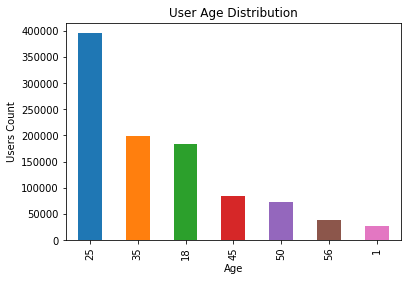

In [14]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

### User rating of the movie “Toy Story”

In [15]:
# Toy Story
toystoryRating = dfMaster[dfMaster['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
346,3114,Toy Story 2 (1999),Animation|Children's|Comedy,9,4,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
715,3114,Toy Story 2 (1999),Animation|Children's|Comedy,10,4,978225759,F,35,1,95370
770,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825
1075,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,1,10,48073


In [16]:
toystoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

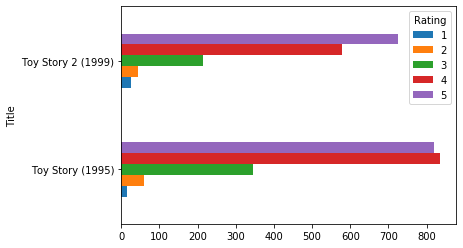

In [17]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

### Top 25 movies by viewership rating

In [18]:
dfTop25 = dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

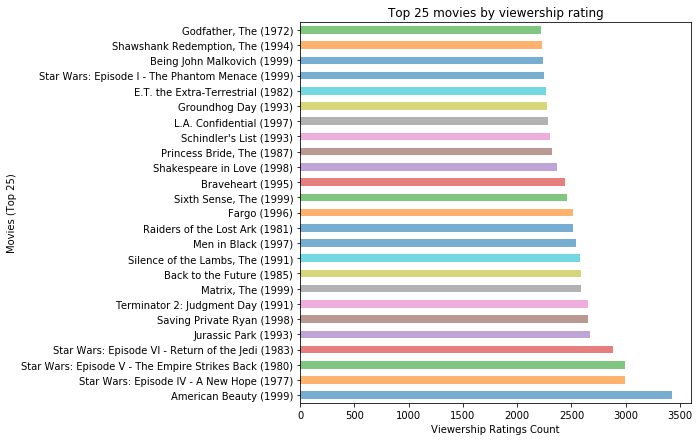

In [19]:
dfTop25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()


### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [20]:
userId = 2696
userRatingById = dfMaster[dfMaster["UserID"] == userId]
userRatingById

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


## Feature Engineering

### Find out all the unique genres 

In [21]:
#dfGenres = dfMaster[]
dfGenres = dfMaster['Genres'].str.split("|")

In [22]:
dfGenres

0                            [Animation, Children's, Comedy]
1                  [Animation, Children's, Musical, Romance]
2                                                    [Drama]
3                       [Action, Adventure, Fantasy, Sci-Fi]
4                                               [Drama, War]
5                                        [Children's, Drama]
6                   [Animation, Children's, Comedy, Musical]
7                           [Animation, Children's, Musical]
8                           [Animation, Children's, Musical]
9                                   [Crime, Drama, Thriller]
10                          [Animation, Children's, Musical]
11                                               [Animation]
12                             [Animation, Comedy, Thriller]
13                          [Animation, Children's, Musical]
14                                        [Musical, Romance]
15                   [Adventure, Children's, Drama, Musical]
16                      

In [23]:

listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))

In [24]:
# All Unique genres
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [25]:
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")

In [26]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [27]:
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)

In [28]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [29]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [30]:
dfMaster.to_csv("Final_Master.csv")

### Determine the features affecting the ratings of any particular movie.

In [31]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [32]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [33]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null object
Genres         1000209 non-null object
UserID         1000209 non-null int64
Rating         1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null object
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zip-code       1000209 non-null object
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Musical        1000209 non-null int64
Mystery        1000209 non-null int64
Romance  

In [34]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [35]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [36]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','1')

In [37]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','0')

In [38]:
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [39]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [40]:
dfGenderAffecting = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]
dfGenderAffecting

Gender
0    753769
1    246440
dtype: int64

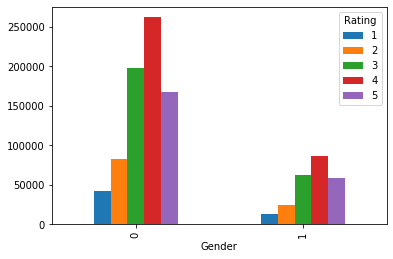

In [41]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

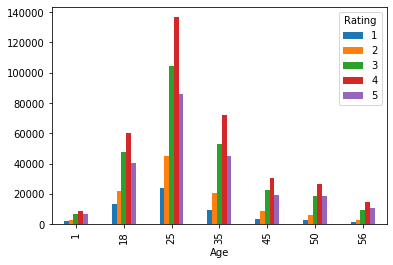

In [42]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

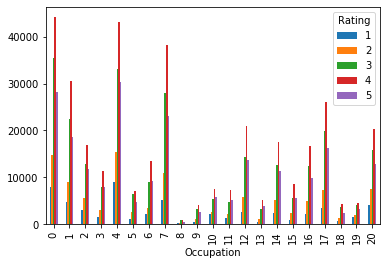

In [43]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

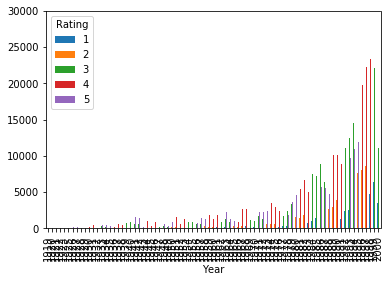

In [44]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

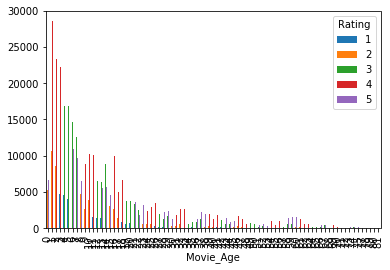

In [45]:
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

### Develop an appropriate model to predict the movie ratings

In [46]:
#First 500 extracted records
first_500 = dfMaster[:1500]

In [47]:
first_500

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,1,1,10,48067,...,0,0,0,0,0,0,0,0,1993,7
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,1,1,10,48067,...,0,1,0,0,0,0,0,0,1992,8
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,1,1,10,48067,...,0,1,0,0,0,0,0,0,1937,63
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,1,1,10,48067,...,0,1,0,0,0,0,0,0,1991,9
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,1,1,10,48067,...,0,0,0,0,0,1,0,0,1996,4


In [48]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [49]:
#Use rating as label
labels = first_500[['Rating']].values

In [50]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [1748,   35,    0],
       [1784,   35,    0],
       [1805,   35,    0]], dtype=int64)

In [51]:
labels

array([[5],
       [5],
       [5],
       ...,
       [4],
       [3],
       [3]], dtype=int64)

In [52]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [53]:
train

array([[2002,   35,    1],
       [2453,   35,    1],
       [1673,   25,   12],
       ...,
       [1073,   18,    3],
       [1240,   35,    0],
       [1127,    1,   10]], dtype=int64)

In [54]:
test

array([[ 919,    1,   10],
       [  76,   35,    0],
       [ 594,   35,    1],
       ...,
       [3081,    1,   10],
       [ 457,   35,    0],
       [3176,    1,   10]], dtype=int64)

In [55]:
train_labels

array([[4],
       [4],
       [5],
       ...,
       [4],
       [5],
       [3]], dtype=int64)

In [56]:
test_labels

array([[4],
       [3],
       [5],
       [4],
       [3],
       [5],
       [3],
       [5],
       [4],
       [3],
       [1],
       [4],
       [3],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [3],
       [3],
       [4],
       [5],
       [3],
       [5],
       [5],
       [3],
       [3],
       [4],
       [5],
       [5],
       [2],
       [5],
       [3],
       [3],
       [5],
       [3],
       [4],
       [1],
       [1],
       [4],
       [4],
       [4],
       [3],
       [3],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [1],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [2],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [4],
    

In [57]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


34.53

In [58]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


95.32

In [59]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


59.0

In [60]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.22

In [61]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24.78

In [62]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


33.43

In [63]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30.75

In [64]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

99.3

In [65]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


99.3

In [66]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.30
8,Decision Tree,99.30
0,Support Vector Machines,95.32
1,KNN,59.00
4,Naive Bayes,35.22
2,Logistic Regression,34.53
7,Linear SVC,33.43
6,Stochastic Gradient Decent,30.75
5,Perceptron,24.78
